In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dataset= pd.read_csv("/content/train.csv")

In [ ]:
dataset.head(10)

,'id','type','text'
0,1,ham,Go until jurong point
1,2,ham,Ok lar... Joking wif u oni...'
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,ham,U dun say so early hor... U c already then say...
4,5,ham,Nah I don't think he goes to usf
5,6,spam,FreeMsg Hey there darling it's been 3 week's n...
6,7,ham,Even my brother is not like to speak with me. ...
7,8,ham,As per your request 'Melle Melle (Oru Minnamin...
8,9,spam,WINNER!! As a valued network customer you have...
9,10,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:

dataset.columns=['id','label','message']
dataset.head()

,id,label,message
0,1,ham,Go until jurong point
1,2,ham,Ok lar... Joking wif u oni...'
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,ham,U dun say so early hor... U c already then say...
4,5,ham,Nah I don't think he goes to usf


In [ ]:
dataset.shape

(310, 3)

In [ ]:
dataset=dataset.drop(['id'], axis=1)
dataset.head(10)

,label,message
0,ham,Go until jurong point
1,ham,Ok lar... Joking wif u oni...'
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
dataset.isnull().sum()

S.No    0
type    0
text    1
dtype: int64

# Stemming and Removing Stop Words 

In [ ]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ',str(dataset['message'][i]))## replacing all with space other that characters or alphabets 
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]# stemming all the words which are not present in  stopwords 
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
print(corpus)

['go jurong point', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf', 'freemsg hey darl week word back like fun still tb ok xxx std chg send', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight', 'six chanc win cash', 'urgent week free membership', 'search right word thank breather promis wont take help grant fulfil promis wonder bless time', 'date sunday', 'xxxmobilemovieclub use credit', 'oh k watch', 'eh u rememb spell name ye v naughti make v wet', 'fine way u feel way gota b', 'england v macedonia dont miss goal t

# Comparing CountVectorizer and Tf-idf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x1=count_vect.fit_transform(corpus).toarray()

In [ ]:
print(x1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x2=tf.fit_transform(corpus).toarray()

In [ ]:
print(x2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y=pd.get_dummies(dataset['label'])
y=y.iloc[:,1].values

In [ ]:
print(y)

[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0]


In [ ]:
#CountVectorizer
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.2,random_state=0)

from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB().fit(x1_train,y1_train)


In [ ]:
#TF_IDF

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y,test_size=0.2,random_state=0)
model2=MultinomialNB().fit(x2_train,y2_train) 

In [ ]:
#score
print('CountVectorizer')
print('Training score: ',model1.score(x1_train,y1_train))
print('Test score: ',model1.score(x1_test,y1_test))

print('TF_IDF')
print('Training score: ',model2.score(x2_train,y2_train))
print('Test score: ',model2.score(x2_test,y2_test))

CountVectorizer
Training score:  0.9959677419354839
Test score:  0.8870967741935484
TF_IDF
Training score:  0.9193548387096774
Test score:  0.8709677419354839


CountVectorizer has better accuracy than Tfidf

In [ ]:
pred=model1.predict(x1_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1_test,pred)

Confusion Matrix


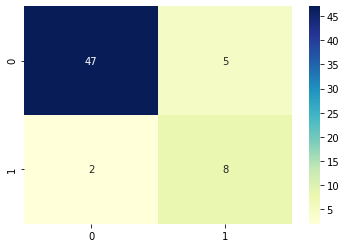

In [ ]:
print("Confusion Matrix")
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d',cmap="YlGnBu")